In [1]:
# Importing the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split  
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression

In [2]:
# Importing the data set
df = pd.read_csv("BostonHousing.csv")

This data frame contains the following columns:

    crim : per capita crime rate by town.

    zn: proportion of residential land zoned for lots over 25,000 sq.ft.

    indus: proportion of non-retail business acres per town.

    chas: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

    nox: nitrogen oxides concentration (parts per 10 million).

    rm: average number of rooms per dwelling.

    age: proportion of owner-occupied units built prior to 1940.

    dis: weighted mean of distances to five Boston employment centres.

    rad: index of accessibility to radial highways.

    tax: full-value property-tax rate per $10,000.

    ptratio: pupil-teacher ratio by town.

    black: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

    lstat: lower status of the population (percent).

    medv: median value of owner-occupied homes in $1000s.

### Question 1: Describe the data:
1. What missing values are there?
2. What are the summary statistics of the numerical features?
3. What do the distributions of the features look like?

In [3]:
# What are the missing values?
df.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

#### Comment: No NaN values in the dataset

In [4]:
# Summary Statistics:

df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


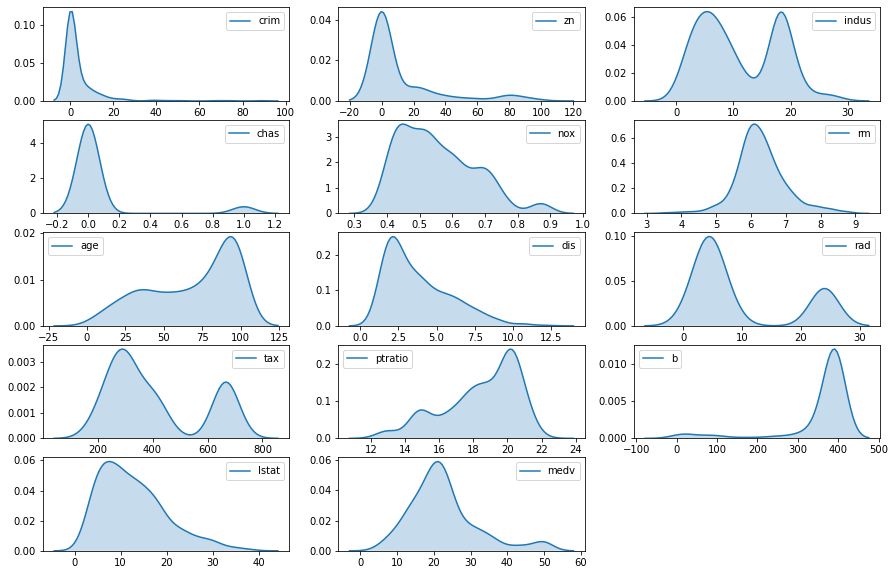

In [5]:
# Plotting the distributions of the data:
plt.figure(figsize = (15,10))

for i in np.arange(1,len(df.columns)+1):
    plt.subplot(5,3,i)
    sns.kdeplot( df.iloc[:,i-1], shade = True)
    plt.legend()



### 2. What features are most correlated with housing price?

In [6]:
# Correlation matrix between the columns:

corr = df.corr()
display(corr)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


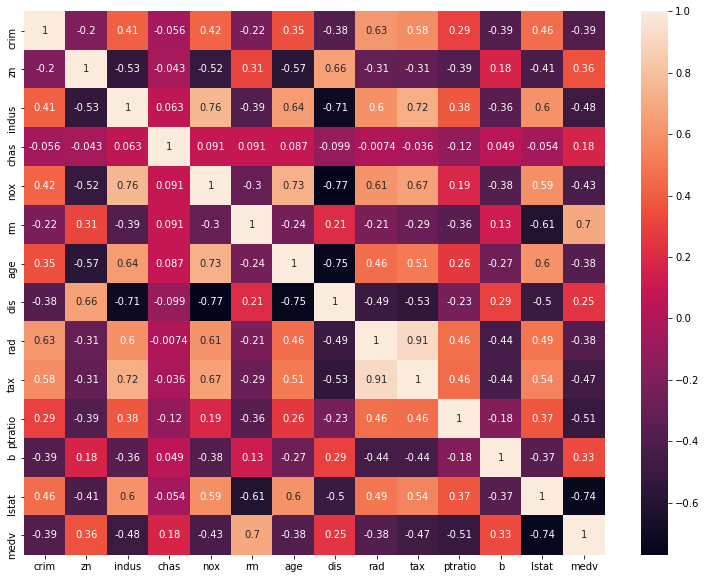

In [7]:
plt.figure(figsize = (13,10))
ax = sns.heatmap(corr, annot=True)

In [8]:
# Sorting the absolute values of the correlations:

corr['medv'].abs().sort_values(ascending= False)

medv       1.000000
lstat      0.737663
rm         0.695360
ptratio    0.507787
indus      0.483725
tax        0.468536
nox        0.427321
crim       0.388305
rad        0.381626
age        0.376955
zn         0.360445
b          0.333461
dis        0.249929
chas       0.175260
Name: medv, dtype: float64

#### Highly correlated with Housing Prices (medv):
1. Lstat (Negative Correlation): lower status of the population (percent)
   Intuative since housing prices would decrease in the neighborhoods with lower status
   
2. rm: average number of rooms per dwelling
    Bigger houses = Expensive Houses

3. Ptratio: pupil-teacher ratio by town:
   Might just be a proxy for better schools

### Generate a new feature based on the existing dataset that you think would help explain housing prices and plot its relationship with housing price

Candidates for new features:

a. lstat and crim might represent similar information and can be combined together in some    feature. They have a positive correlation of 0.46, which might 

b. 

In [9]:
# Inserting the relavant features into the model:

X = df[['lstat','rm','ptratio']]
y = df['medv']

### With scikit-learn, develop a model with the training data and make predictions on the test data. Plot your predictions.

In [10]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [11]:
print(f"Head of features:{X.head()}")

print(f"Head of Model:{y.head()}")

Head of features:   lstat     rm  ptratio
0   4.98  6.575     15.3
1   9.14  6.421     17.8
2   4.03  7.185     17.8
3   2.94  6.998     18.7
4   5.33  7.147     18.7
Head of Model:0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: medv, dtype: float64


In [12]:
# split into test and train data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=0)

In [30]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
model = regressor.fit(X_train, y_train)

In [31]:
y_pred = regressor.predict(X_test)

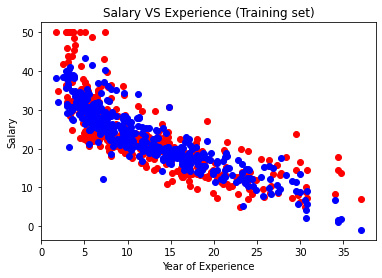

In [32]:
viz_train = plt
viz_train.scatter(X_train['lstat'], y_train, color='red')
viz_train.scatter(X_train['lstat'], regressor.predict(X_train), color='blue')
viz_train.title('Salary VS Experience (Training set)')
viz_train.xlabel('Year of Experience')
viz_train.ylabel('Salary')
viz_train.show()

In [21]:
X_train.count()

lstat      404
rm         404
ptratio    404
dtype: int64

In [22]:
y_train.count()

404

In [29]:
model

LinearRegression()